In [ ]:
# ..... get bulk and single-cell coexp cons scores across species for CHD genes ..... #

In [4]:
library(ggplot2)
library(ggridges)
library(dplyr)

In [5]:
# get bulk coexp cons scores 
spe = c('human', 'chimp', 'rhesusm', 'crabm', 'mouse', 'rat', 'rabbit', 'boar', 'cow', 'dog', 'horse', 'goat',
         'sheep', 'chicken', 'zebrafish', 'atlanticsalmon', 'rainbowtrout',
         'fruitfly', 'roundworm', 'bee', 'bombyx', 'yeast', 'arabidopsis', 'maize', 'tomato')

bulkspec = read.delim('~/Primate_MTG/bulk_coexp_spec_cross_species_25.csv', sep = ',')
colids = grep(paste(spe[c(1:15,18,19)], collapse = '|'), colnames(bulkspec))
bulkspec$animal_avg = rowMeans(bulkspec[,colids], na.rm = T)

dim(bulkspec)
bulkspec[1,]

[1] 14131   302

gene human_chimp human_rhesusm human_crabm human_mouse human_rat human_rabbit
1 A1BG 0.9171331   0.6754909     0.519668    0.3459922   0.432844  0.5321471   
  human_boar human_cow human_dog ⋯ bombyx_arabidopsis bombyx_maize
1 0.8450163  0.1639923 0.9315495 ⋯ NA                 NA          
  bombyx_tomato yeast_arabidopsis yeast_maize yeast_tomato arabidopsis_maize
1 NA            NA                NA          NA           NA               
  arabidopsis_tomato maize_tomato animal_avg
1 NA                 NA           0.813818

In [6]:
# single cell pseudobulk coexp cons
cons = read.delim('pseudobulk_scores.csv', sep = ',')
cons[1:2,]

gene   score    
1 SPRY2  0.8087578
2 PCDH20 0.8008320

In [49]:
# build DisGeNET gene list for heart diseases
ids = c('C0152101', 'C0007193', 'C0007194', 'C0152021', 'C0039685', 'C0025521')
df1 = c()
for(ii in 1:length(ids)){
    temp = read.delim(paste0(ids[ii], '_disease_gda_summary.csv'), sep = ',')
    df1 = rbind(df1, temp)
}

df1[1,]
table(df1$Disease)

Disease                         Disease_id Gene   Gene_id UniProt
1 Hypoplastic Left Heart Syndrome C0152101   NKX2-5 1482    P52952 
  Gene_Full_Name Protein_Class        N_diseases_g DSI_g DPI_g pLI    
1 NK2 homeobox 5 Transcription factor 165          0.533 0.692 0.94531
  Score_gda EL_gda EI_gda N_PMIDs N_SNPs_gda First_Ref Last_Ref
1 0.81      NA     1      4       0          2003      2017


        Cardiomyopathy, Dilated        Congenital heart disease 
                            512                             267 
    Hypertrophic Cardiomyopathy Hypoplastic Left Heart Syndrome 
                            560                              52 
    Inborn Errors of Metabolism             Tetralogy of Fallot 
                            119                             274 

In [50]:
df1 %>% group_by(Disease) %>% summarise(num_genes = n(), num_LoF = sum(pLI>0.9, na.rm = T))

Disease                         num_genes num_LoF
1 Cardiomyopathy, Dilated         512       110    
2 Congenital heart disease        267        73    
3 Hypertrophic Cardiomyopathy     560        93    
4 Hypoplastic Left Heart Syndrome  52        19    
5 Inborn Errors of Metabolism     119        13    
6 Tetralogy of Fallot             274        93

In [51]:
# add bulk, single cell coexp cons scores
df1$bulk_cons = bulkspec$animal_avg[match(df1$Gene, bulkspec$gene)]
df1$sn_cons = cons$score[match(df1$Gene, cons$gene)]
df1[1:2,]

Disease                         Disease_id Gene   Gene_id UniProt
1 Hypoplastic Left Heart Syndrome C0152101   NKX2-5 1482    P52952 
2 Hypoplastic Left Heart Syndrome C0152101   GJA1   2697    P17302 
  Gene_Full_Name               Protein_Class        N_diseases_g DSI_g DPI_g
1 NK2 homeobox 5               Transcription factor 165          0.533 0.692
2 gap junction protein alpha 1 Cell-cell junction   662          0.393 0.885
  pLI     Score_gda EL_gda EI_gda N_PMIDs N_SNPs_gda First_Ref Last_Ref
1 0.94531 0.81      NA     1      4       0          2003      2017    
2 0.15523 0.70      NA     1      3       0          2001      2009    
  bulk_cons sn_cons  
1        NA 0.9171223
2 0.9144986 0.6999930

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 249 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 249 rows containing missing values (`geom_point()`).”


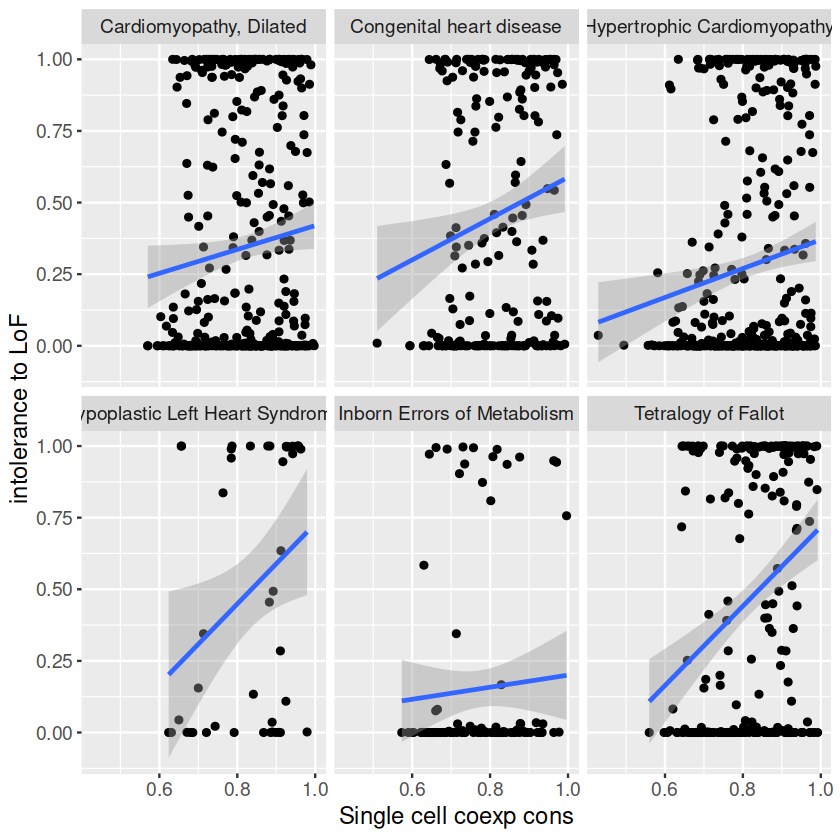

In [52]:
# png('aa-sc-pli-coexpcons.png', width = 8, height = 8, res = 300, units = 'in')
ggplot(df1, aes(x = sn_cons, y = pLI)) + geom_point() + geom_smooth(method = 'lm') + 
theme(text = element_text(size=14)) + facet_wrap(~Disease) + 
xlab('Single cell coexp cons') + ylab('intolerance to LoF')
# dev.off()

Picking joint bandwidth of 0.0214

Warning message:
“Removed 437 rows containing non-finite values (`stat_density_ridges()`).”


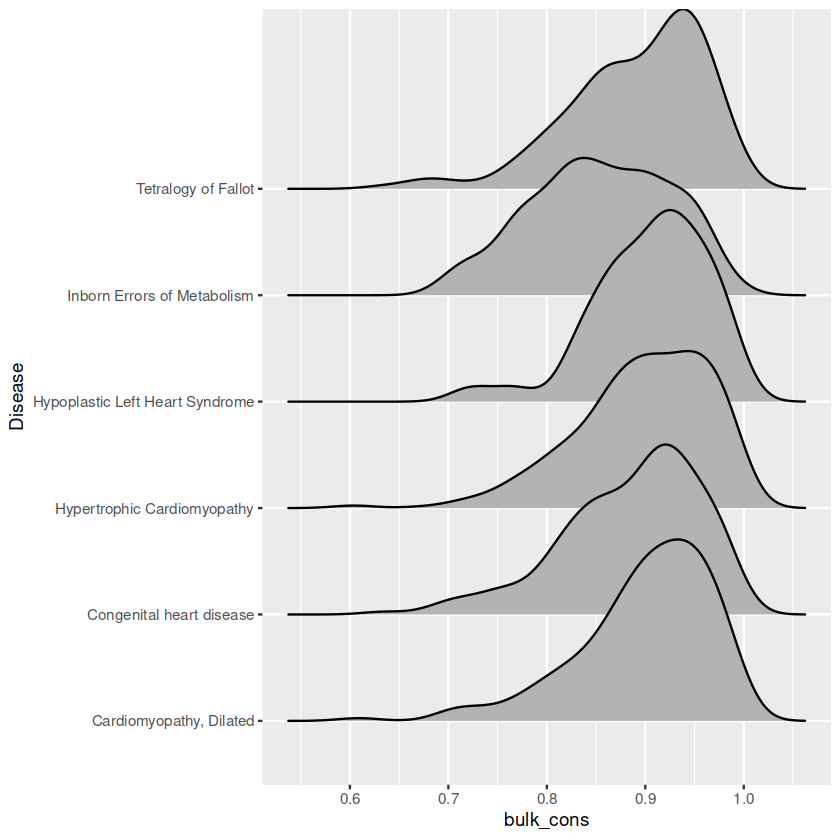

In [53]:
ggplot(df1, aes(bulk_cons, Disease)) + geom_density_ridges()

In [63]:
df1[df1$Disease=='Inborn Errors of Metabolism' & df1$sn_cons<0.6 & !is.na(df1$sn_cons),]

Disease                     Disease_id Gene  Gene_id UniProt
1669 Inborn Errors of Metabolism C0025521   ABCD4 5826    O14678 
1705 Inborn Errors of Metabolism C0025521   GALE  2582    Q14376 
     Gene_Full_Name                            Protein_Class N_diseases_g DSI_g
1669 ATP binding cassette subfamily D member 4 Transporter   26           0.769
1705 UDP-galactose-4-epimerase                               30           0.722
     DPI_g pLI        Score_gda EL_gda EI_gda N_PMIDs N_SNPs_gda First_Ref
1669 0.308 1.3364e-12 0.30      NA     1      1       0          2012     
1705 0.385 1.4757e-10 0.02      NA     1      2       0          1995     
     Last_Ref bulk_cons sn_cons  
1669 2012     0.7658330 0.5733753
1705 1998     0.8735252 0.5899057

In [44]:
# compare with control vs disease coexp cons
dis1 = c('Hypoplastic Left Heart Syndrome', 'Cardiomyopathy, Dilated', 'Hypertrophic Cardiomyopathy',
         'Tetralogy of Fallot', 'Inborn Errors of Metabolism', 'Congenital heart disease')
dis2 = c('HF_HLHS', 'DCM', 'HCM', 'TOF', 'Metabolism', 'CHD')

id = 4
stage1 = 'Donor'
stage2 = dis2[id]
des = read.delim(paste0('CHD_', stage1, '_', stage2, '_pseudobulk_coexp_cons.csv'), sep = ',')
des[1:3,]

Donor        Disease      fc        sc       
1 RP11-34P13.7 RP11-34P13.7 0.5533916 0.8403212
2 AL627309.1   AL627309.1   0.7518603 0.9624637
3 AP006222.2   AP006222.2   0.4896619 0.4809670

In [45]:
df2 = df1[df1$Disease==dis1[id],]
des$disease = 'none'
keep_ids = match(df2$Gene, des$Donor)
keep_ids <- keep_ids[!is.na(keep_ids)]
des$disease[keep_ids] = dis2[id]

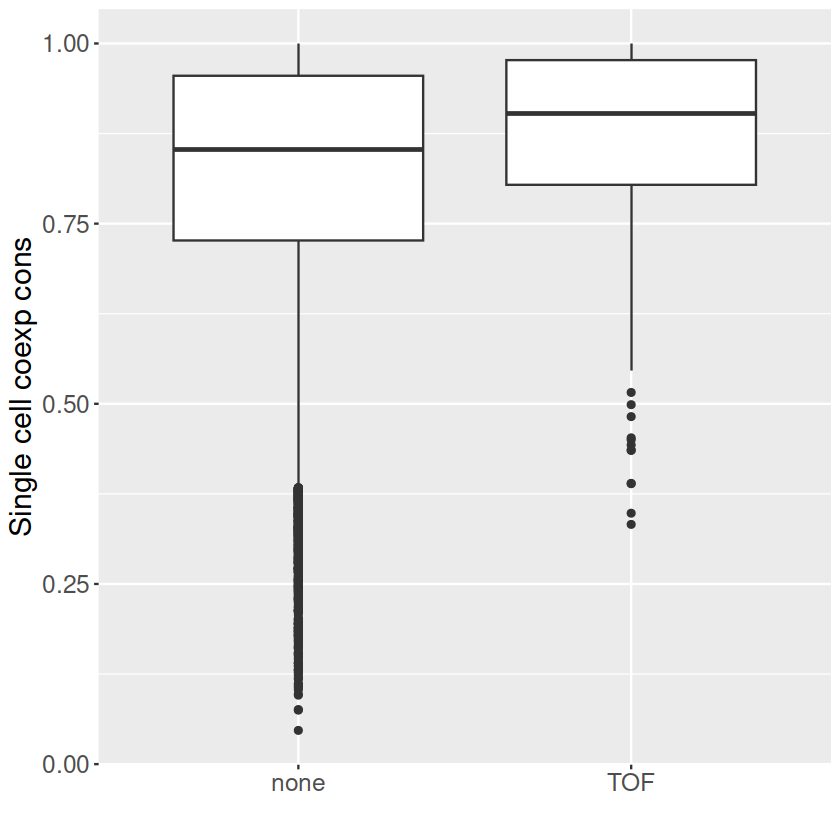

In [47]:
# png(paste0('aa-', dis2[id], '-.png'), width = 4, height = 5, res = 300, units = 'in')
ggplot(des, aes(disease, sc)) + geom_boxplot() + theme(text = element_text(size=18)) + 
ylab('Single cell coexp cons') + xlab('')
# dev.off()

In [32]:
des[des$sc<0.5 & des$disease!='none',]

Donor  Disease fc        sc        disease
505   OPRD1  OPRD1   0.4924520 0.3326670 TOF    
4624  TDGF1  TDGF1   0.5526815 0.4429182 TOF    
7242  SMN1   SMN1    0.4981081 0.4822142 TOF    
7868  HAND1  HAND1   0.5116600 0.4501794 TOF    
9102  GJA1   GJA1    0.5390151 0.4527593 TOF    
9969  SEMA3E SEMA3E  0.3826608 0.4988040 TOF    
10550 XRCC2  XRCC2   0.5074891 0.3481975 TOF    
12623 FANCG  FANCG   0.2054852 0.3891167 TOF    
17508 MBNL2  MBNL2   0.5042444 0.4358449 TOF    
20424 FOXF1  FOXF1   0.4298298 0.4352640 TOF    
26156 COL2A1 COL2A1  0.1665342 0.3895951 TOF